# Imports

In [75]:
%reset -f

import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay

# Setting up data

In [76]:
df = pd.read_csv("churn.csv").drop(["RowNumber", "CustomerId", "Surname"], axis=1)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [78]:
object_cols = df.select_dtypes("object").columns
df[object_cols] = df[object_cols].astype("category").apply(lambda x: x.cat.codes)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


# Data exploration

<Axes: xlabel='Exited', ylabel='count'>

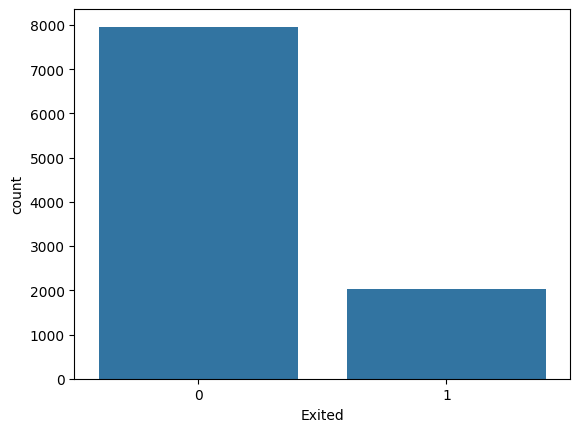

In [79]:
sns.countplot(df, x="Exited")
# 20% of customers have left the bank

In [80]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Geography,10000.0,0.746300,0.827529,0.00,0.00,0.000,1.0000,2.00
Gender,10000.0,0.545700,0.497932,0.00,0.00,1.000,1.0000,1.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48


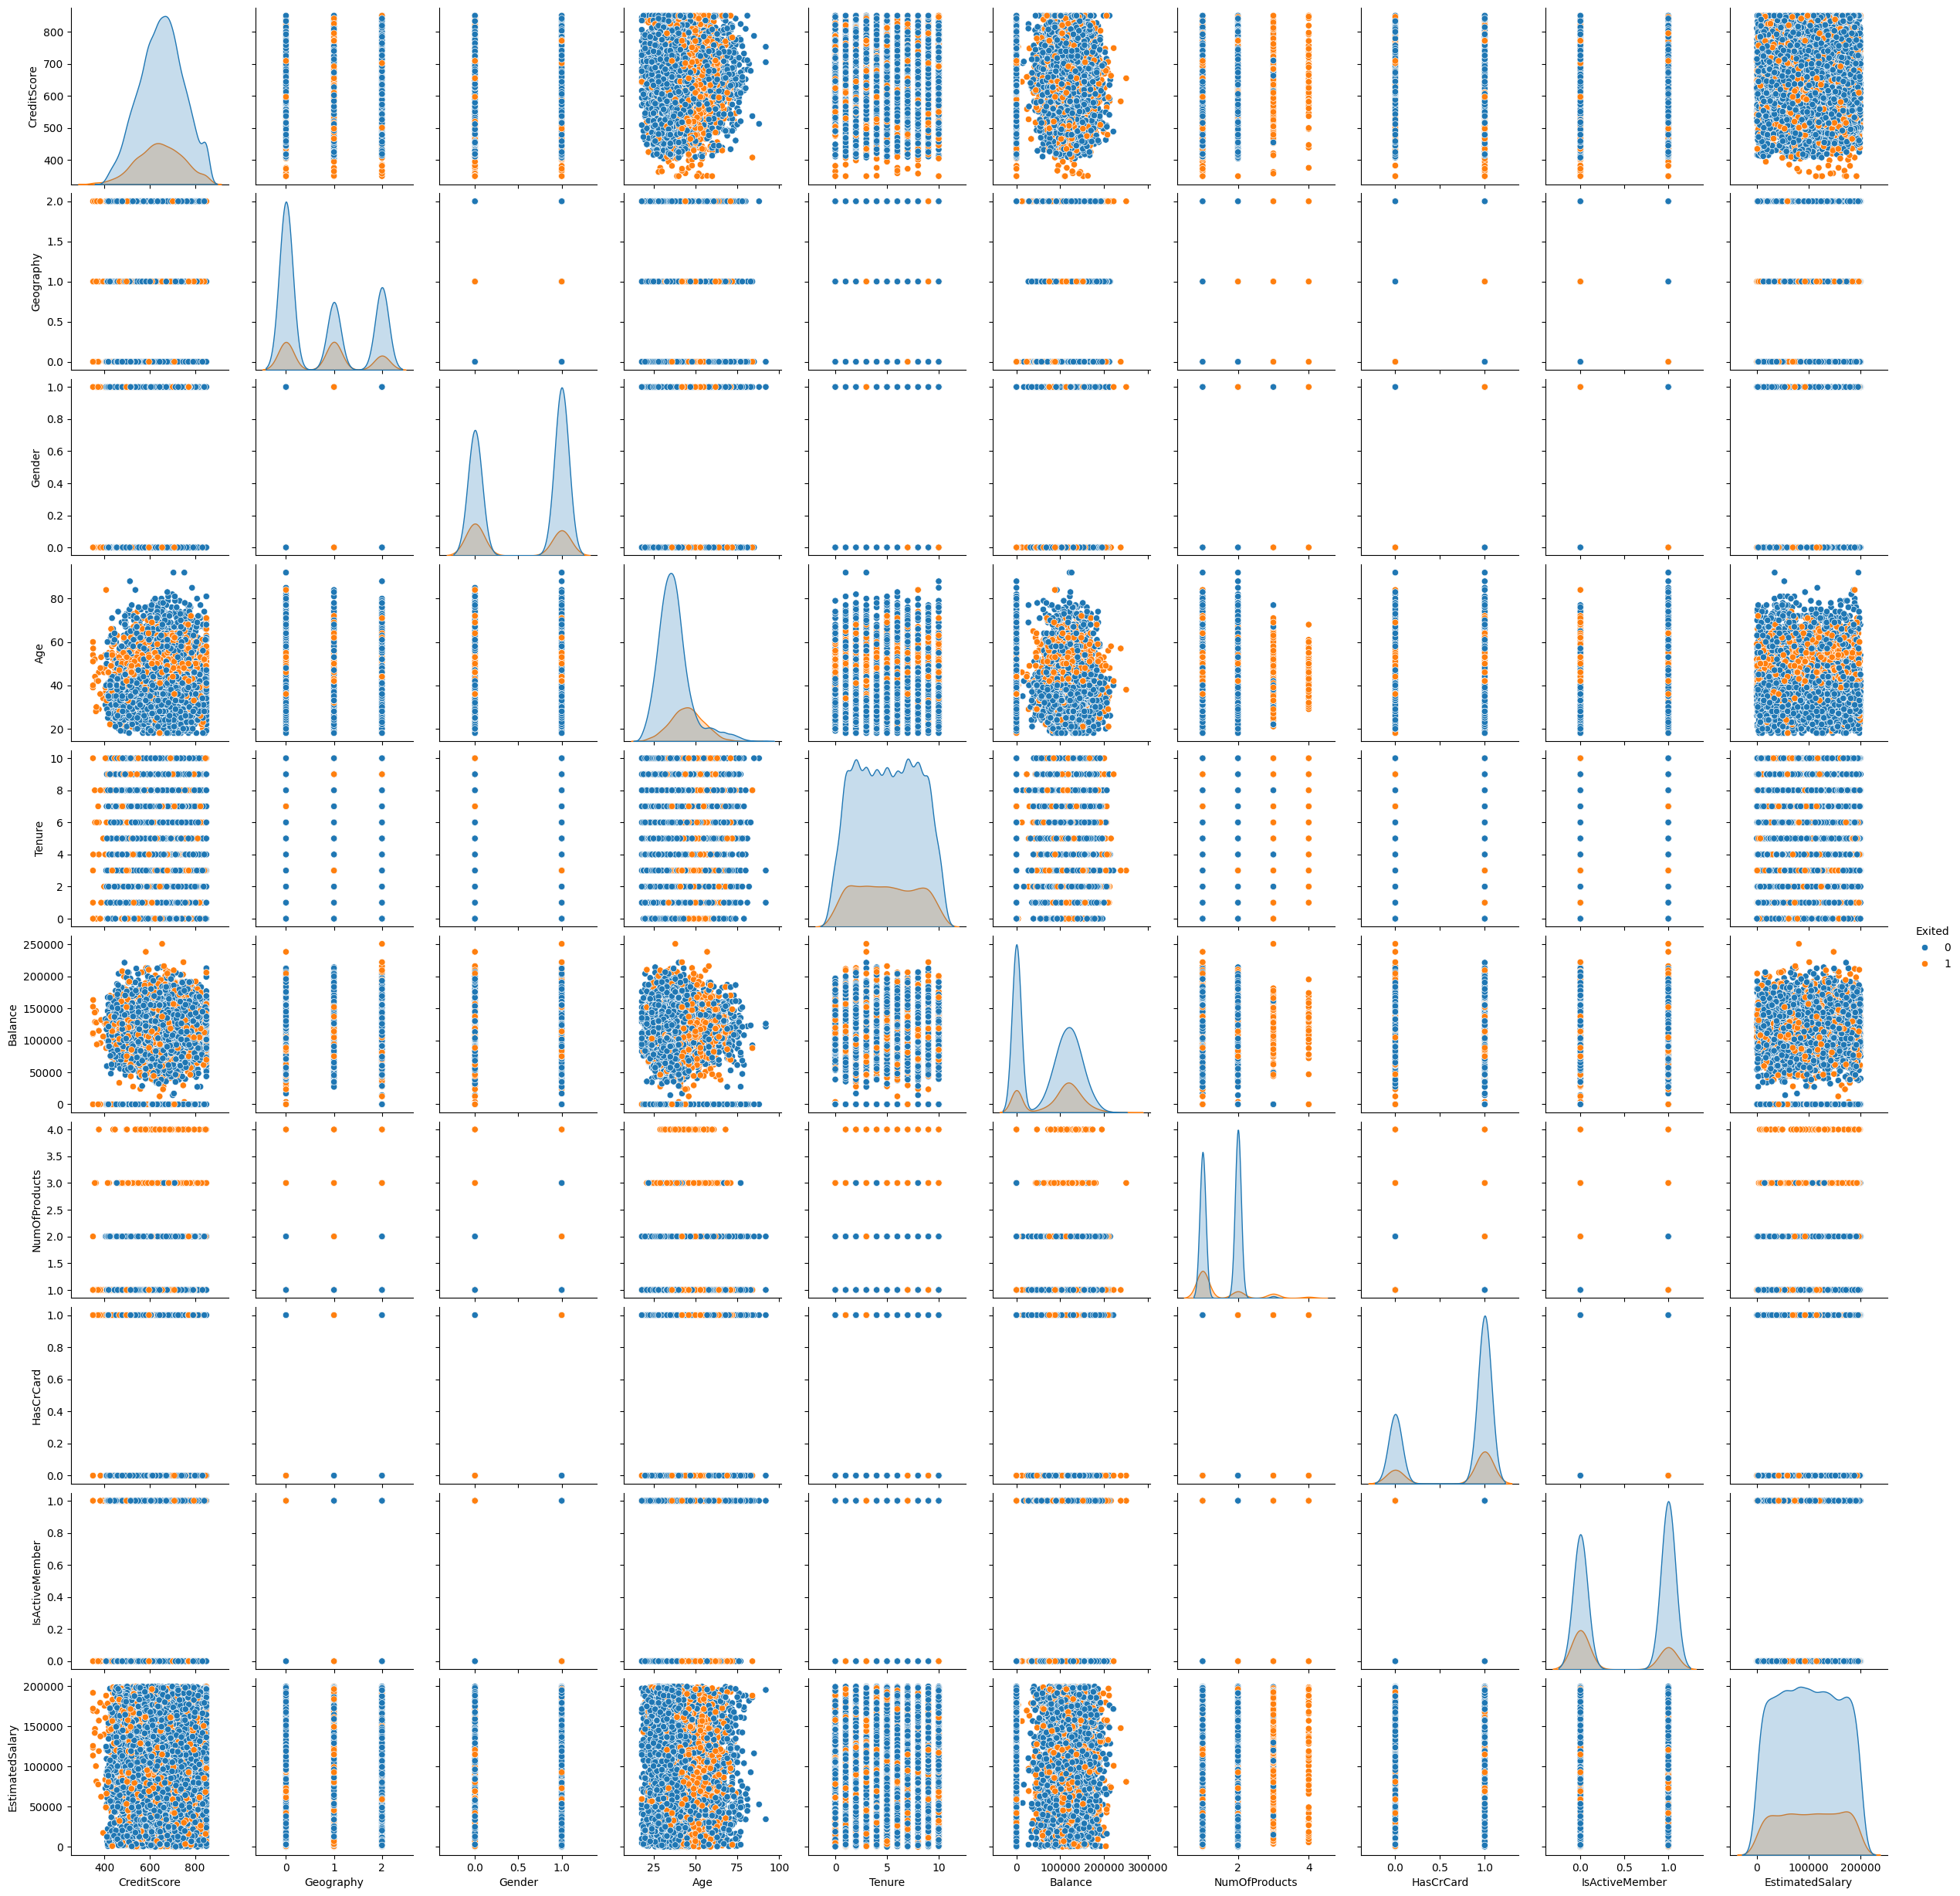

In [81]:
sns.pairplot(df, hue="Exited")

<Axes: >

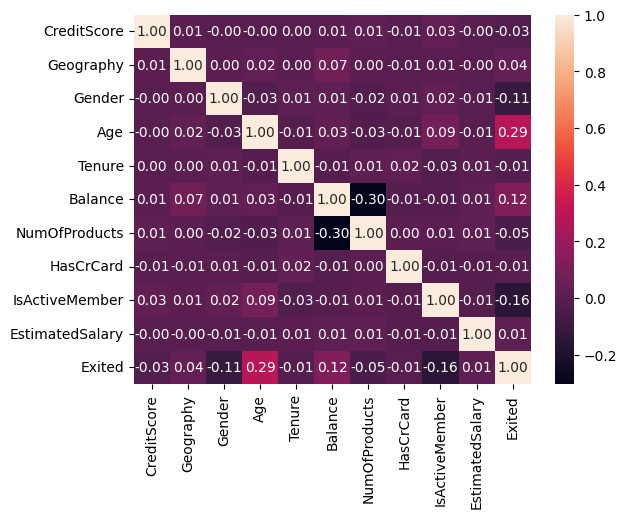

In [82]:
sns.heatmap(df.corr(), annot=True, fmt= '.2f')
# Age, isActiveMember, Balance and Gender have the highest impact on whether a person would leave the bank
# However isActiveMember and Balance have some correlation with age so we should explore more
# Whereas EstimatedSalary, HasCrCard and Tenure have almost no correlation

<Axes: xlabel='Age', ylabel='Exited'>

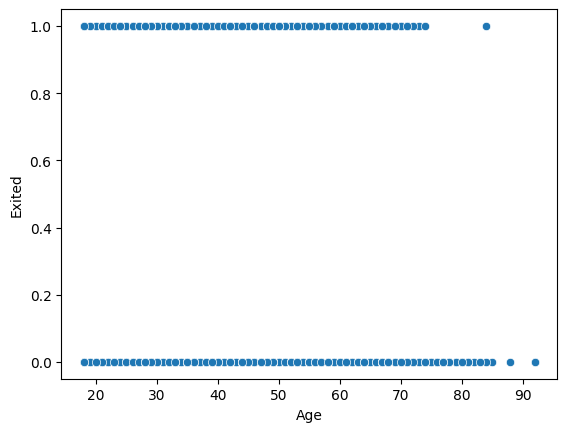

In [83]:
sns.scatterplot(df, x="Age", y="Exited")
# People after 75 don't exit

<Axes: xlabel='Age', ylabel='Exited'>

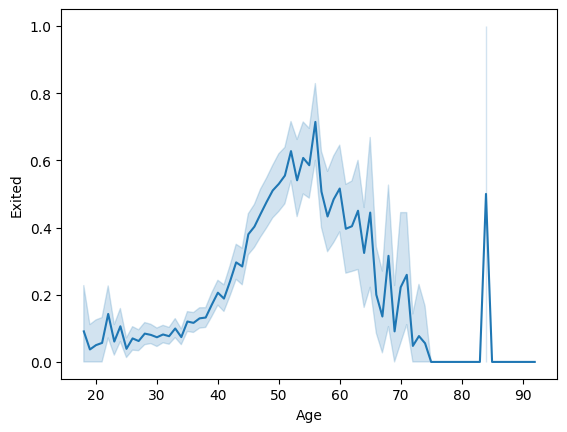

In [84]:
sns.lineplot(df, x="Age", y="Exited")
# People exit the most between 40-70 and age has the highest correlation for that

<Axes: xlabel='Age', ylabel='Balance'>

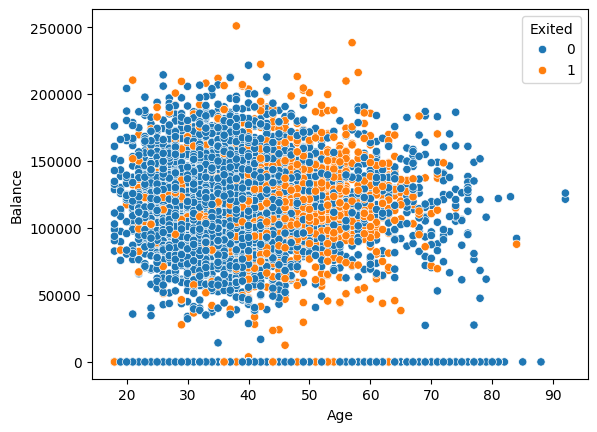

In [85]:
sns.scatterplot(df, x="Age", y="Balance",hue="Exited")
# It seems like Balance correletion with Exited is not because of Balance-Age correlation

<Axes: xlabel='Age', ylabel='IsActiveMember'>

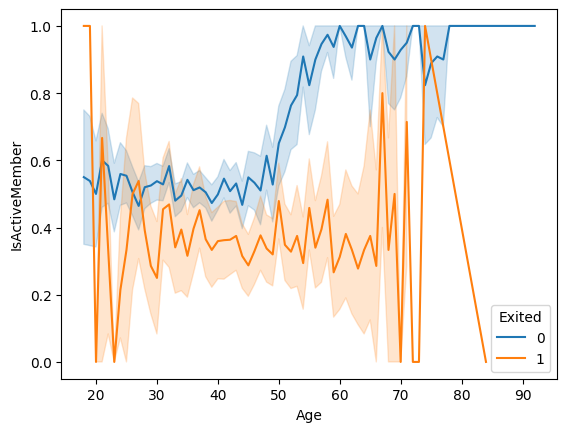

In [86]:
sns.lineplot(df, x="Age", y="IsActiveMember", hue="Exited")
# There is big increase on the average activity for people after 50 who have not exited, the others stay at relatevely constant activity

# Training

In [111]:
X = df.drop(["Exited", "EstimatedSalary", "HasCrCard", "Tenure"], axis=1)
X

,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,IsActiveMember
0,619,0,0,42,0.00,1,1
1,608,2,0,41,83807.86,1,1
2,502,0,0,42,159660.80,3,0
3,699,0,0,39,0.00,2,0
4,850,2,0,43,125510.82,1,1
...,...,...,...,...,...,...,...
9995,771,0,1,39,0.00,2,0
9996,516,0,1,35,57369.61,1,1
9997,709,0,0,36,0.00,1,1
9998,772,1,1,42,75075.31,2,0


In [112]:
y = df["Exited"]
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [106]:
scaler = StandardScaler()
scaler

StandardScaler()

In [114]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_train

array([[-0.65389765, -0.90159272, -1.09714258, ..., -1.23182634,
         0.8081088 ,  0.97086858],
       [ 0.14484853,  0.30715665,  0.91145856, ...,  1.2319162 ,
         0.8081088 , -1.03000552],
       [ 0.52866163, -0.90159272,  0.91145856, ...,  1.10240437,
        -0.90964728,  0.97086858],
       ...,
       [ 0.67388821,  0.30715665,  0.91145856, ...,  0.7913911 ,
         0.8081088 ,  0.97086858],
       [-0.75763092, -0.90159272,  0.91145856, ..., -1.23182634,
         0.8081088 ,  0.97086858],
       [ 0.0203686 ,  1.51590602, -1.09714258, ...,  0.18348619,
         0.8081088 ,  0.97086858]])

In [117]:
scaled_X_test = scaler.transform(X_test)
scaled_X_test

array([[-0.33232451,  1.51590602,  0.91145856, ..., -1.23182634,
         0.8081088 ,  0.97086858],
       [-0.3634445 , -0.90159272,  0.91145856, ..., -0.05918563,
        -0.90964728,  0.97086858],
       [-1.4007772 , -0.90159272, -1.09714258, ..., -0.23401865,
        -0.90964728,  0.97086858],
       ...,
       [ 0.06186191,  1.51590602,  0.91145856, ...,  0.68938349,
         0.8081088 ,  0.97086858],
       [ 1.18218123,  0.30715665, -1.09714258, ...,  0.68469071,
         0.8081088 ,  0.97086858],
       [-0.65389765,  1.51590602,  0.91145856, ...,  0.5181515 ,
        -0.90964728,  0.97086858]])

# KNN

In [118]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(scaled_X_train, y_train)
print(classification_report(y_test, knn_model.predict(scaled_X_test)))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       789
           1       0.63      0.56      0.60       211

    accuracy                           0.84      1000
   macro avg       0.76      0.74      0.75      1000
weighted avg       0.83      0.84      0.84      1000



# Logistic Regression

In [119]:
log_model = LogisticRegression()
log_model.fit(scaled_X_train, y_train)
print(classification_report(y_test, log_model.predict(scaled_X_test)))

# In conclusion the average precision is better with KNN
# KNN predicts more accurately when a client is not about to exit, and as accurate for the other case
# I tried different columns combinations and this predicted most accurately


# PS. I am not exactly sure what does the other metrics show, I would be happy to know :)

              precision    recall  f1-score   support

           0       0.82      0.97      0.89       789
           1       0.63      0.19      0.30       211

    accuracy                           0.81      1000
   macro avg       0.72      0.58      0.59      1000
weighted avg       0.78      0.81      0.76      1000

